# Classifier 2D - Alzheimers Disease

In [3]:
import numpy as np
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.xception import Xception
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Activation, GlobalAveragePooling2D

from keras.layers import Conv2D
from keras.layers import UpSampling2D, MaxPooling2D, BatchNormalization, RandomFlip, RandomRotation, RandomZoom

import time


2023-12-04 10:16:36.110937: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 10:16:36.455628: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 10:16:36.459712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 10:16:37.714921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Preparation of the data

In [4]:
# Path to the dataset
import csv
import nibabel as nib
data_dir = "./lib/"
csv_path = './list_standardized_tongtong_2017.csv'
with open(csv_path, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data = np.array(data)
c = {"id":0, "rooster_id":1, "age":3, "sex":4, "label":5, "conversion":6, "MMSE":7, "RAVLT":8, "FAQ":9, "CDR-SB": 10}
print(data.shape)
img_size = 128
batch_size = 32

(818, 11)


In [5]:
def get_path_from_ID(ID):
    path = data_dir
    path += "n_mmni_fADNI_" + ID + "_1.5T_t1w.nii.gz"
    return path

irm = get_path_from_ID(data[0][0])
img = nib.load(irm)
print(irm)
print(img.shape)

./lib/n_mmni_fADNI_002_S_0295_1.5T_t1w.nii.gz
(181, 217, 181)


In [6]:
def get_HC(irm):
    hc1 = irm[40:80, 90:130, 40:80]
    hc2 = irm[100:140, 90:130, 40:80]
    return hc1, hc2

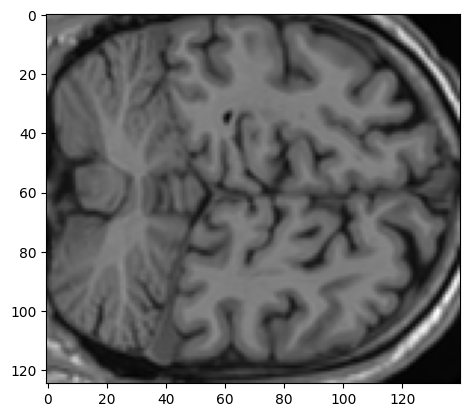

In [38]:
def show_2D(irm, slice, axe):
    if axe == "x":
        plt.imshow(irm[slice,:,:], cmap="gray")
    elif axe == "y":
        plt.imshow(irm[:,slice,:], cmap="gray")
    elif axe == "z":
        plt.imshow(irm[:,:,slice], cmap="gray")
    plt.title("Slice number : " + str(slice) + " on axe " + axe)
    plt.show()
    
# show_2D(img.get_fdata(), 60, "x")
# show_2D(img.get_fdata(), 60, "y")
# show_2D(img.get_fdata(), 60, "z")



plt.imshow(img.get_fdata()[30:155,60,10:150], cmap="gray")


NameError: name 'classes' is not defined

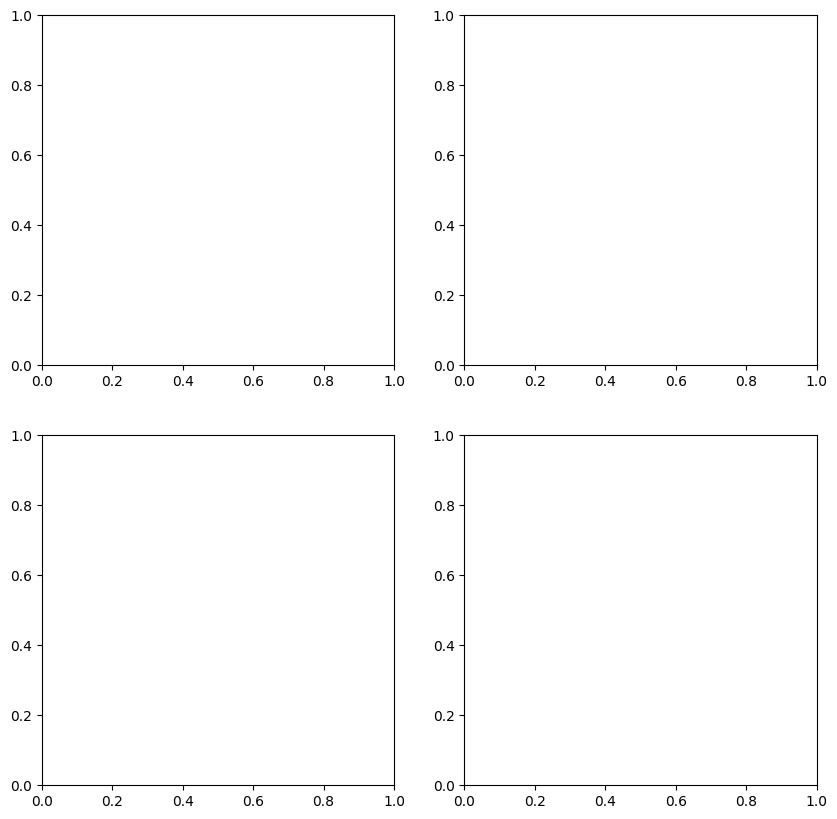

In [8]:
# Some examples of the slices where the alzheimer is visible with the 3D IRM
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
for i in range(2):
    for j in range(2):
        img = nib.load(os.path.join(data_dir, classes[1], classes[1] + '_000' + str(i) + '.nii.gz'))
        img = img.get_fdata()
        ax[i, j].imshow(img[:, :, slice_number_of_irm_part_where_alzheimer_is_visible + j], cmap='gray')
        ax[i, j].set_title('IRM slice ' + str(slice_number_of_irm_part_where_alzheimer_is_visible + j))

In [ ]:
data_gen = image.ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2, rotation_range=40, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

train_dataset = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_dataset = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
num_classes = len(classes)

model = Sequential([
    Conv2D(16, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes)
])


# Build the model
model.build(input_shape=(None, img_size, img_size, 3))

model.compile(optimizer="adam",
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.summary()

NameError: name 'classes' is not defined

In [ ]:
epochs = 10 

history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/10
161/161 [==============================] - 55s 339ms/step - loss: 1.0174 - accuracy: 0.4989 - val_loss: 1.0776 - val_accuracy: 0.4433
Epoch 2/10
161/161 [==============================] - 50s 313ms/step - loss: 0.9397 - accuracy: 0.5331 - val_loss: 1.1582 - val_accuracy: 0.3761
Epoch 3/10
 59/161 [=========>....................] - ETA: 29s - loss: 0.8997 - accuracy: 0.5689

KeyboardInterrupt: 

In [ ]:
# Save model 
model.save("model_2D_v1_surapprentissage.h5")

/home/felicien/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
num_classes = len(classes)

model = Sequential([
    # data augmentation
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Conv2D(16, 3, padding="same", activation="relu"),
    Dropout(0.1),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.1),
    BatchNormalization(),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Dropout(0.1),
    Flatten(),
    Dropout(0.1),
    BatchNormalization(),
    Dense(128, activation="relu"),
    Dense(num_classes)
])


# Build the model
model.build(input_shape=(None, img_size, img_size, 3))

model.compile(optimizer="adam",
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_186 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 dropout_50 (Dropout)        (None, 180, 180, 16)      0         
                                                                 
 batch_normalization_53 (Ba  (None, 180, 180, 16)      64        
 tchNormalization)                                   

In [ ]:
epochs = 10 

history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/10
161/161 [==============================] - 71s 431ms/step - loss: 1.6329 - accuracy: 0.4794 - val_loss: 4.8423 - val_accuracy: 0.5004
Epoch 2/10
161/161 [==============================] - 79s 493ms/step - loss: 0.9319 - accuracy: 0.5393 - val_loss: 3.7802 - val_accuracy: 0.5004
Epoch 3/10
161/161 [==============================] - 75s 465ms/step - loss: 0.9141 - accuracy: 0.5472 - val_loss: 4.0133 - val_accuracy: 0.5004
Epoch 4/10
161/161 [==============================] - 74s 462ms/step - loss: 0.9086 - accuracy: 0.5493 - val_loss: 1.4533 - val_accuracy: 0.5137
Epoch 5/10
161/161 [==============================] - 76s 470ms/step - loss: 0.8994 - accuracy: 0.5507 - val_loss: 1.4758 - val_accuracy: 0.5410
Epoch 6/10
161/161 [==============================] - 72s 446ms/step - loss: 0.8958 - accuracy: 0.5614 - val_loss: 1.3283 - val_accuracy: 0.4050
Epoch 7/10
161/161 [==============================] - 63s 390ms/step - loss: 0.8859 - accuracy: 0.5501 - val_loss: 1.7563 - val_ac

In [ ]:
num_classes = len(classes)

from keras.applications.mobilenet import MobileNet

#create model with MobileNet
MobileNet_model = MobileNet(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
MobileNet_model.trainable = False

# create the model
model = Sequential()
model.add(MobileNet_model)
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(4, activation='softmax'))


# compile the model
model.compile(optimizer="adam",
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 dropout_38 (Dropout)        (None, 4, 4, 1024)        0         
                                                                 
 global_average_pooling2d_4  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_39 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_46 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                     

In [ ]:
epochs = 10 

history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/10


/home/felicien/.local/lib/python3.8/site-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


161/161 [==============================] - 17s 95ms/step - loss: 1.0360 - accuracy: 0.5548 - val_loss: 1.1921 - val_accuracy: 0.4347
Epoch 2/10
161/161 [==============================] - 14s 89ms/step - loss: 0.7548 - accuracy: 0.6624 - val_loss: 1.2543 - val_accuracy: 0.4355
Epoch 3/10
161/161 [==============================] - 14s 89ms/step - loss: 0.6866 - accuracy: 0.6963 - val_loss: 1.2337 - val_accuracy: 0.4402
Epoch 4/10
161/161 [==============================] - 14s 89ms/step - loss: 0.6370 - accuracy: 0.7301 - val_loss: 1.2654 - val_accuracy: 0.4527
Epoch 5/10
161/161 [==============================] - 14s 89ms/step - loss: 0.6064 - accuracy: 0.7331 - val_loss: 1.2756 - val_accuracy: 0.4527
Epoch 6/10
161/161 [==============================] - 14s 90ms/step - loss: 0.5871 - accuracy: 0.7471 - val_loss: 1.2831 - val_accuracy: 0.4613
Epoch 7/10
161/161 [==============================] - 14s 90ms/step - loss: 0.5773 - accuracy: 0.7485 - val_loss: 1.3356 - val_accuracy: 0.4636
Epo

In [ ]:
# Model Unet for segmentation and draw bounding box around the object Alzeihmer
